<h1 style='background:#00091c; border:0;'><center style='color:#00cdff'>Análise e Classificação</center><center style='color:white'>de Laudos</center></h1> 

 # **<span style="color:##00cdff;">ÍNDICE</span>**

**IMPORTANDO BIBLIOTECAS**

**CARREGANDO OS DADOS**

**PRÉ-PROCESSANDO OS DADOS**

**ANÁLISE DOS DADOS**

**CRIAÇÃO DO MODELO**

**CONCLUSÕES**

 # **<span style="color:##00cdff;">IMPORTANDO BIBLIOTECAS</span>**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import gensim, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.phrases import ENGLISH_CONNECTOR_WORDS
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from wordcloud import WordCloud, STOPWORDS
from pprint import pprint
import matplotlib.colors as mcolors

In [4]:
stopwords = ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou', 'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja', 'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos', 'serão', 'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam']

 # **<span style="color:##00cdff;">CARREGANDO OS DADOS</span>**

In [5]:
data = pd.read_csv("sample_laudos.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   docid           5000 non-null   int64 
 1   modalidade      5000 non-null   object
 2   tipo_exame      5000 non-null   object
 3   laudo_completo  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


In [7]:
data.head()

,docid,modalidade,tipo_exame,laudo_completo
0,189988,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
1,376443,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,realizados cortes tomográficos axiais com técn...
2,1843933,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,tecnica: \n o estudo tomográfico computadoriza...
3,454421,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,o estudo tomográfico computadorizado do tórax ...
4,61595,CT,TOMOGRAFIA COMPUTADORIZADA DO TÓRAX,realizada tomografia computadorizada do tórax ...


 # **<span style="color:##00cdff;">ANÁLISE DOS DADOS</span>**
 
Os dados são laudos médicos derivados de tomografias, radiografias e etc. Alguns laudos descrevem uma patologia encontrada no exame e outros não encontraram nenhum tipo de patologia.

O dataser possui 5000 laudos, e possuem as seguintes características:

* **'docid'**: O id pertencente a cada laudo
* **'modalidade'**: A modalidade de cada tipo de exame
* **'tipo_exame'**: o tipo de exame usado
* **'laudo_completo'**: O texto gerado a partir do tipo de exame

In [8]:
data['tipo_exame'].value_counts()

TOMOGRAFIA COMPUTADORIZADA DO TÓRAX                          3977
RADIOGRAFIA DO TÓRAX                                          936
ULTRA-SONOGRAFIA DO TÓRAX                                      27
RADIOGRAFIA DO TORAX PA                                        17
ANGIO-TOMOGRAFIA COMPUTADORIZADA DO TÓRAX (PROTOCOLO TEP)      13
RADIOGRAFIA DO TORAX PA E PERFIL                                9
RESSONÂNCIA MAGNÉTICA DO TÓRAX                                  8
RESSONÂNCIA MAGNÉTICA DO TÓRAX E MEDIASTINO                     6
RADIOGRAFIA DAS COSTELAS POR HEMITÓRAX                          6
RADIOGRAFIA DAS COSTELAS POR HEMITÓRAX  UNILATERAL              1
Name: tipo_exame, dtype: int64

In [11]:
data['modalidade'].value_counts()

CT    3990
CR     969
US      27
MR      14
Name: modalidade, dtype: int64

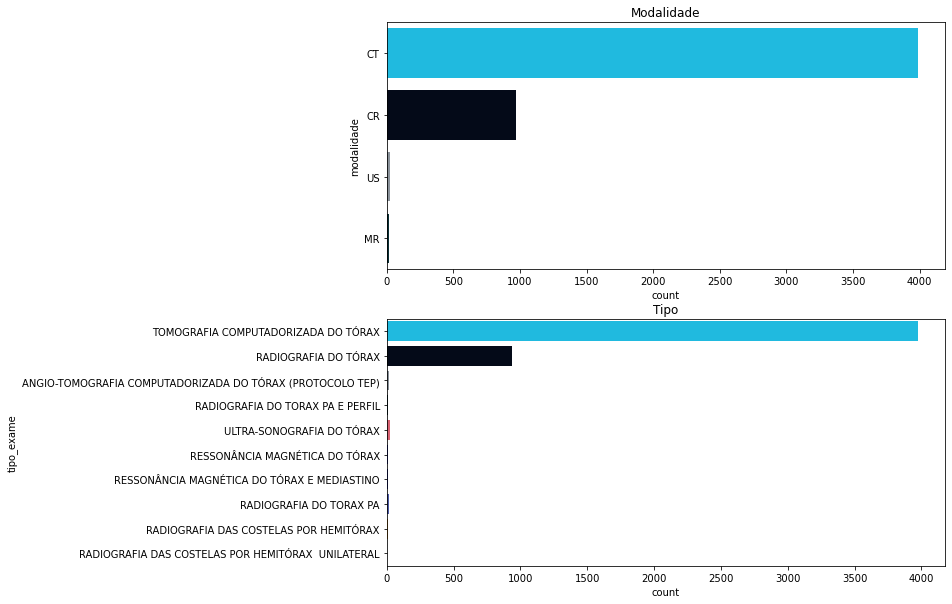

In [12]:
colours=["#00cdff","#00091c", "#87929d", "#03363d", "#ec4d63", "#0310c9", "#0310c9", "#3f51b5", "#ff9800", "#8bc34a"]
#sns.set(rc={'figure.figsize':(11,8.27)})

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.countplot(ax=axes[0], data=data, y="modalidade", palette=colours)
axes[0].set_title("Modalidade")

sns.countplot(ax=axes[1], data=data, y="tipo_exame", palette=colours)
axes[1].set_title("Tipo")

plt.show()

In [13]:
text = ' '.join(data['laudo_completo'].tolist())

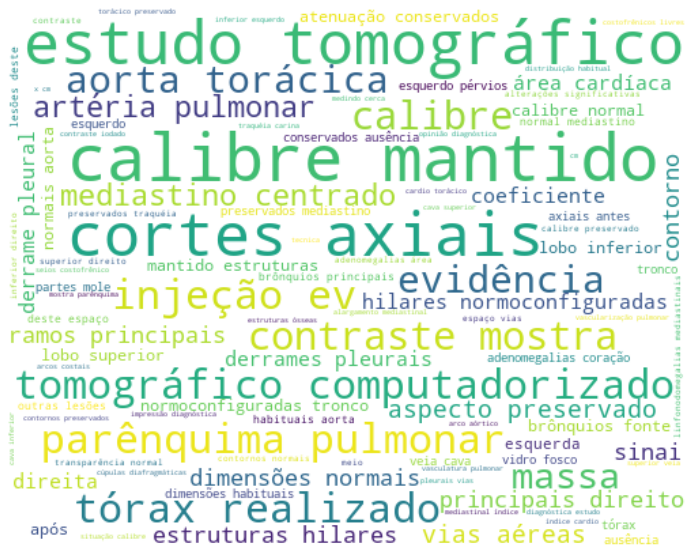

In [14]:
wordcloud = WordCloud(max_words=100, background_color="white", width=500, height=400, stopwords=stopwords).generate(text)

plt.figure(figsize=[15, 10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

A principal modalidade dos laudos são tomografias do tórax de modalidade CT. É possível identificar palavras no contexto radiológico como **estudo tomográfico**, **injeção ev**, **contraste** e **tomográfico computadorizado**. No contexto da anatomia humana aparecem palavras ligadas ao tórax como **aorta torácica**, **lobo superior esquerdo e direito**, **artéria pulmonar**, **coração**, etc e também algumas palavras indicando um diagnóstico, seja ele normal ou com alguma patologia: **derrame pleural**, **aspecto preservado**, **dimensões normais** e etc. 

Como o dado não é rotulado, uma abordagem interessante é usar **LDA (Linear Discriminant Analysis)** que usa um algortimo que identifica tópicos principais de textos. Separando os laudos em tópicos, talvez seja possível identificar sobre o que os laudos estão descrevendo e assim conseguir realizar aplicações com ele.

 # **<span style="color:##00cdff;">PRÉ-PROCESSANDO OS DADOS</span>**

In [15]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)

In [16]:
def remove_stopwords(sentences):
    main_words = []
    for i in sentences:
        filtered_words = [sentence for sentence in i if sentence not in stopwords]
        main_words.append(filtered_words)
    return main_words

In [17]:
data_text = data.laudo_completo.values.tolist()
data_words = list(sent_to_words(data_text))
#data_words = remove_stopwords(data_words)

In [35]:
bigram = gensim.models.Phrases(data_words, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=10)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [36]:
def process_words(texts, stop_words=stopwords):
    texts_out = []
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = [[word for word in simple_preprocess(str(doc))] for doc in texts_out]    
    
    return texts

data_ready = process_words(data_words)  # processed Text Data!

In [37]:
print(data_ready[12])

['exame_laudado', 'sistema', 'telerradiologia', 'aquisicao_axial', 'tomografica', 'uso', 'contraste', 'volumoso_derrame_pleural', 'direita', 'componente', 'intercisural', 'moderado', 'esquerda', 'mediastinais', 'destacando', 'maior', 'cadeia_pre', 'carinal', 'medindo_mm', 'maiores_eixos', 'axiais', 'outra', 'hilar', 'esquerda', 'medindo_mm', 'menor_eixo', 'nodulo_espiculado', 'segmento_apicoposterior', 'lobo_superior', 'esquerdo', 'medindo_cerca', 'mm', 'maiores_eixos', 'axiais', 'focos', 'calcicos', 'excentricos', 'permeio', 'associam', 'nodulos', 'satelites', 'maioria', 'contornos', 'tambem', 'irregulares', 'lobo_superior', 'maior', 'medindo_cerca', 'mm', 'base', 'pleural', 'anterior', 'sinais', 'enfisema_centrolobular', 'predominante', 'campos_pulmonares_superiores', 'padrao', 'reticulado', 'segmentos', 'anteriores', 'lobos_superiores', 'lobo_medio_lingula', 'areas', 'vidro_fosco', 'focos_consolidativos', 'associados', 'podendo_estar_relacionada', 'pneumopatia', 'intesticial', 'nao'

 # **<span style="color:##00cdff;">CRIAÇÃO DO MODELO</span>**

In [48]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

id2word.filter_extremes(no_above=0.5)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [49]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [50]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_ready, start=2, limit=40, step=4)

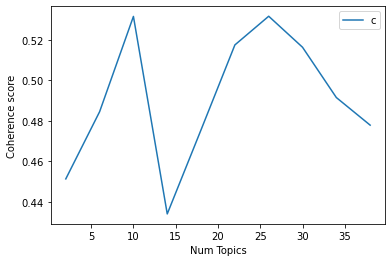

In [51]:
limit=40; start=2; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [53]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4513
Num Topics = 6  has Coherence Value of 0.4845
Num Topics = 10  has Coherence Value of 0.5316
Num Topics = 14  has Coherence Value of 0.434
Num Topics = 18  has Coherence Value of 0.4756
Num Topics = 22  has Coherence Value of 0.5175
Num Topics = 26  has Coherence Value of 0.5317
Num Topics = 30  has Coherence Value of 0.5164
Num Topics = 34  has Coherence Value of 0.4915
Num Topics = 38  has Coherence Value of 0.4779


In [54]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=6,
    iterations=1000,
    random_state=100,
    chunksize=500,
    passes=50,
    alpha=0.01,
    eta=0.9)

pprint(lda_model.print_topics())

[(0,
  '0.039*"contornos" + 0.024*"situacao" + 0.021*"preservados" + '
  '0.017*"normais" + 0.017*"coracao" + 0.015*"ausencia" + 0.012*"sinais" + '
  '0.012*"superior_veia_cava" + 0.012*"normais_veia_cava" + '
  '0.012*"inferior_aorta"'),
 (1,
  '0.018*"direito" + 0.016*"direita" + 0.015*"esquerdo" + 0.013*"esquerda" + '
  '0.011*"cm" + 0.009*"ausencia" + 0.009*"sinais" + 0.008*"lobo_superior" + '
  '0.008*"aspecto" + 0.008*"lobo_inferior"'),
 (2,
  '0.036*"torax" + 0.034*"area_cardiaca_normal" + 0.032*"vasculatura" + '
  '0.031*"transparencia_normal" + 0.031*"pulmonar_seios_costo" + '
  '0.030*"cardiofrenicos_cupulas_frenicas_livres" + '
  '0.028*"pulmonar_distribuicao_usual" + 0.027*"nao_ha_evidencia" + '
  '0.027*"ganglios_mediastinais" + '
  '0.026*"hilares_detectaveis_arcabouco_costal"'),
 (3,
  '0.031*"estudo_tomografico_computadorizado" + 0.031*"contornos_dimensoes" + '
  '0.030*"aspecto_preservados" + 0.030*"evidencias" + 0.030*"massas" + '
  '0.028*"mantido" + 0.028*"normais_a

<ipython-input-55-bda9588f3df8>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-55-bda9588f3df8>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-55-bda9588f3df8>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-55-bda9588f3df8>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-55-bda9588f3df8>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation

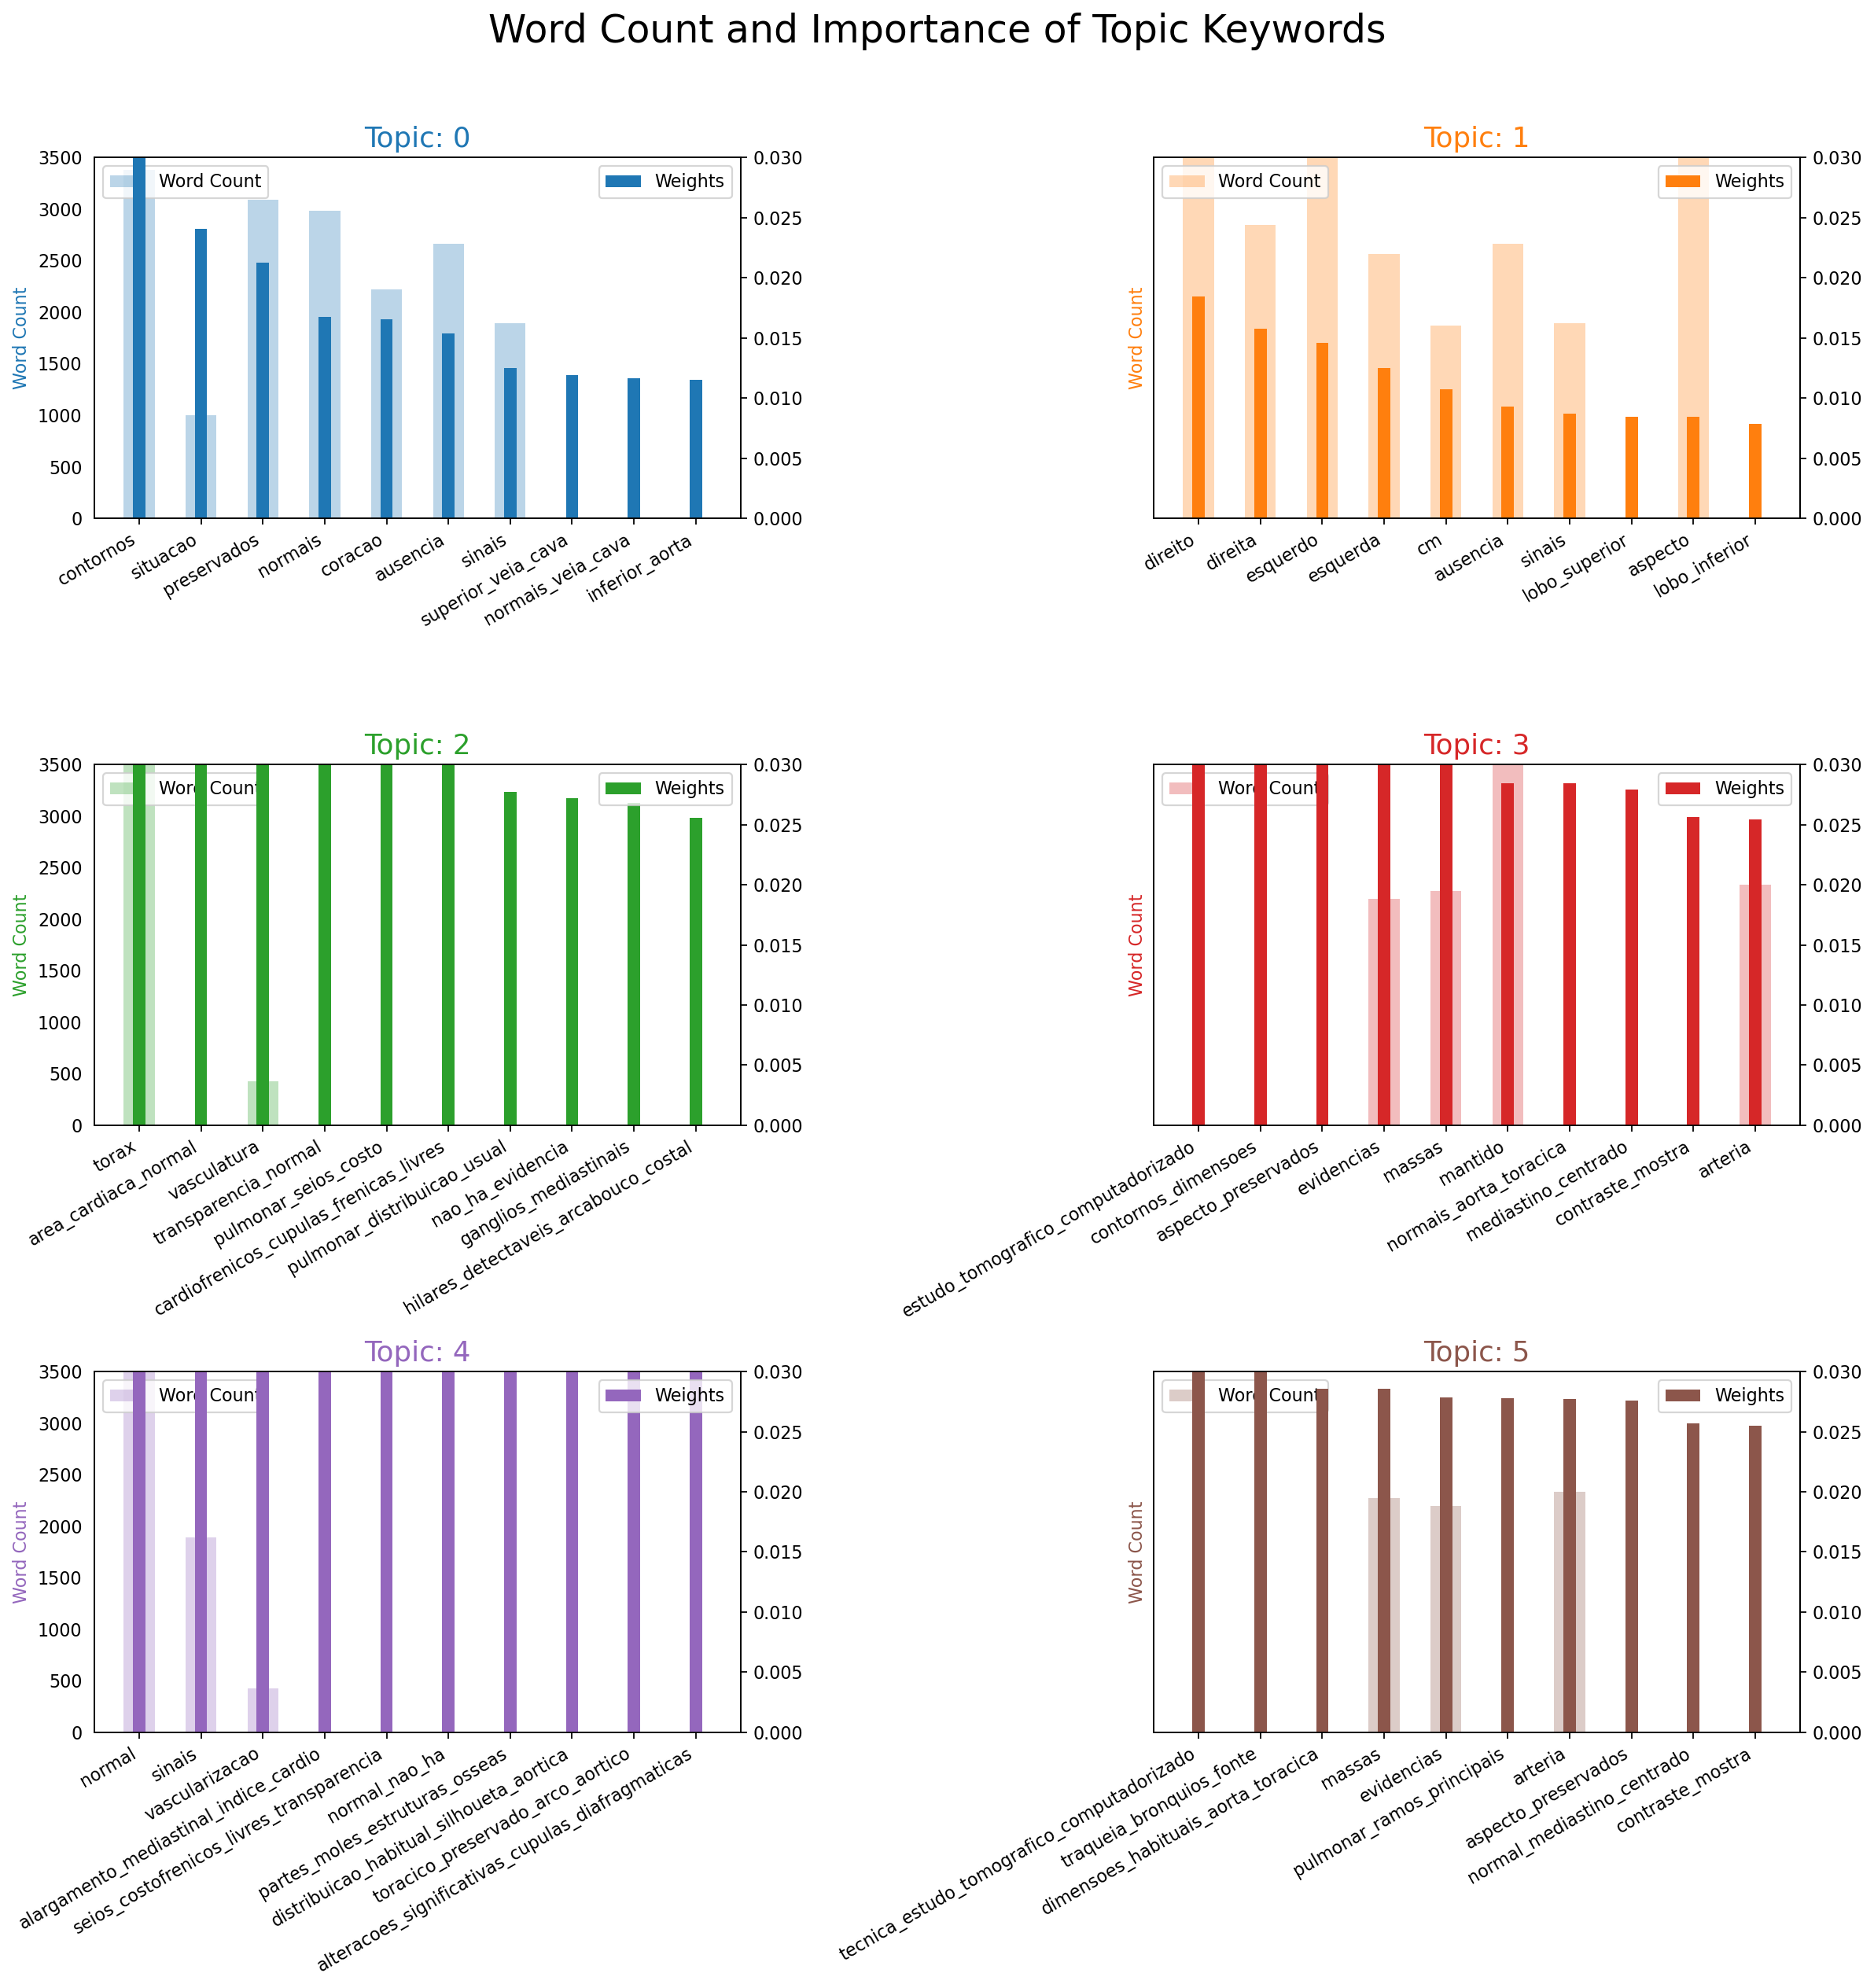

In [55]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(15,15), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

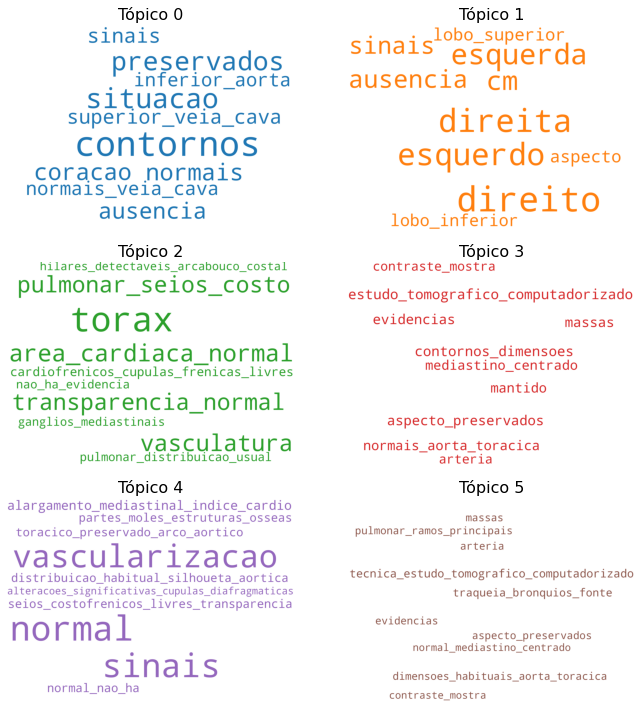

In [59]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Tópico ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [57]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.9982,"estudo_tomografico_computadorizado, contornos_...","[estudo, tomografico, computadorizado, do, tor..."
1,1,0.0,0.6575,"contornos, situacao, preservados, normais, cor...","[realizados, cortes, tomograficos, axiais, com..."
2,2,5.0,0.5752,"tecnica_estudo_tomografico_computadorizado, tr...","[tecnica, estudo, tomografico, computadorizado..."
3,3,3.0,0.5561,"estudo_tomografico_computadorizado, contornos_...","[estudo, tomografico, computadorizado, do, tor..."
4,4,0.0,0.9992,"contornos, situacao, preservados, normais, cor...","[realizada, tomografia, computadorizada, do, t..."
5,5,1.0,0.6612,"direito, direita, esquerdo, esquerda, cm, ause...","[estudo, tomografico, computadorizado, do, tor..."
6,6,3.0,0.9985,"estudo_tomografico_computadorizado, contornos_...","[estudo, tomografico, computadorizado, do, tor..."
7,7,1.0,0.5674,"direito, direita, esquerdo, esquerda, cm, ause...","[exame, laudado, no, sistema, de, telerradiolo..."
8,8,1.0,0.9986,"direito, direita, esquerdo, esquerda, cm, ause...","[aquisicao, com, cortes, axiais, reformatacoes..."
9,9,1.0,0.6431,"direito, direita, esquerdo, esquerda, cm, ause...","[estudo, tomografico, computadorizado, do, tor..."


In [58]:
df_dominant_topic['Dominant_Topic'].value_counts()

1.0    1571
3.0    1113
5.0     726
0.0     586
4.0     550
2.0     454
Name: Dominant_Topic, dtype: int64

É possível ver que o modelo LDA consegue identificar tópicos que representam alguns órgãos e os aspectos que eles se encontram:

* **Tópico 0**: Coração, aspectos normais e/ou preservados
* **Tópico 1**: Pulmões (lobo esquerdo e direito) com ausência de anormalidades
* **Tópico 2**: Tórax de uma forma geral, envolvendo pulmões e a área cardiaca. Mostrando possivilmente um diagnóstico de normalidade.
* **Tópico 3**: Mediastino e contornos com aspectos preservados
* **Tópico 4**: Cúpulas diaframáticas com alterações, estruturas ósseas, alterações no mediastino e vascularização. Esse tópico parece ter pegado mais patologias do que normalidades.
* **Tópico 5**: Aorta torácica e traquéia, ambas com aspectos preservados.

**Conclusão**: Mesmo com modelo conseguir identificar tópicos por órgãos e o aspectos deles, não sei se seria útil para alguma aplicação, porque ele separa tudo de maneira muito genérica, impossibilitando definir os tópicos como rótulos.